In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [35]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [29]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Learn Programming/Machine Learning/potato_disease/data/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [30]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [31]:
len(dataset)

68

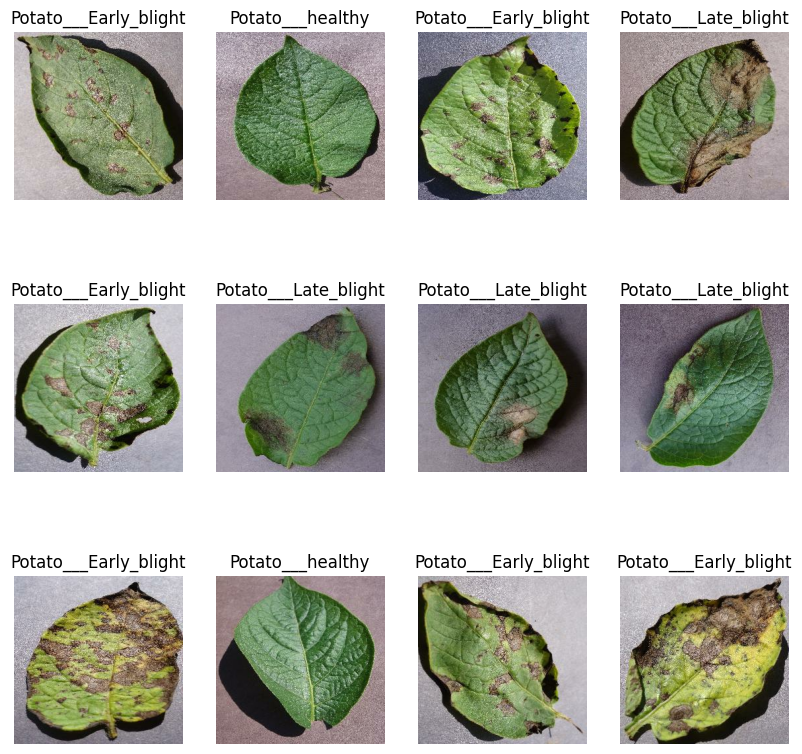

In [33]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [37]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [38]:
train_ds = dataset.take(54)
len(train_ds)

54

In [40]:
dataset.skip(54)
len(train_ds)

54

In [41]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [42]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [43]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [44]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [54]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle =  True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [55]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [56]:
len(train_ds)

54

In [57]:
len(val_ds)

6

In [58]:
len(test_ds)

8